In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os,sys
from glob import glob

BTCV Dataset Path

In [2]:
path='/media/ahnsunghyun/HDD/dataset/BTCV/Abdomen/Abdomen'

RawData (Training) : 1GB / 30 imgs, labels

In [3]:
id='0001'
label_path=os.path.join(path,'RawData','Training','label','label'+id+'.nii.gz')
image=nib.load(label_path).get_fdata()
title=os.path.basename(label_path)
print(image.shape)

for i in range(image.shape[-1]):
    answer=image[:,:,i]
    print(f'{title}[:,:,{i}]',np.unique(answer,return_counts=True))

(512, 512, 147)
label0001.nii.gz[:,:,0] (array([0.]), array([262144]))
label0001.nii.gz[:,:,1] (array([0.]), array([262144]))
label0001.nii.gz[:,:,2] (array([0.]), array([262144]))
label0001.nii.gz[:,:,3] (array([0.]), array([262144]))
label0001.nii.gz[:,:,4] (array([0.]), array([262144]))
label0001.nii.gz[:,:,5] (array([0.]), array([262144]))
label0001.nii.gz[:,:,6] (array([0.]), array([262144]))
label0001.nii.gz[:,:,7] (array([0.]), array([262144]))
label0001.nii.gz[:,:,8] (array([0.]), array([262144]))
label0001.nii.gz[:,:,9] (array([0.]), array([262144]))
label0001.nii.gz[:,:,10] (array([0.]), array([262144]))
label0001.nii.gz[:,:,11] (array([0.]), array([262144]))
label0001.nii.gz[:,:,12] (array([0.]), array([262144]))
label0001.nii.gz[:,:,13] (array([0.]), array([262144]))
label0001.nii.gz[:,:,14] (array([0.]), array([262144]))
label0001.nii.gz[:,:,15] (array([0.]), array([262144]))
label0001.nii.gz[:,:,16] (array([0.]), array([262144]))
label0001.nii.gz[:,:,17] (array([0.]), arr

img0001: (512, 512, 147)


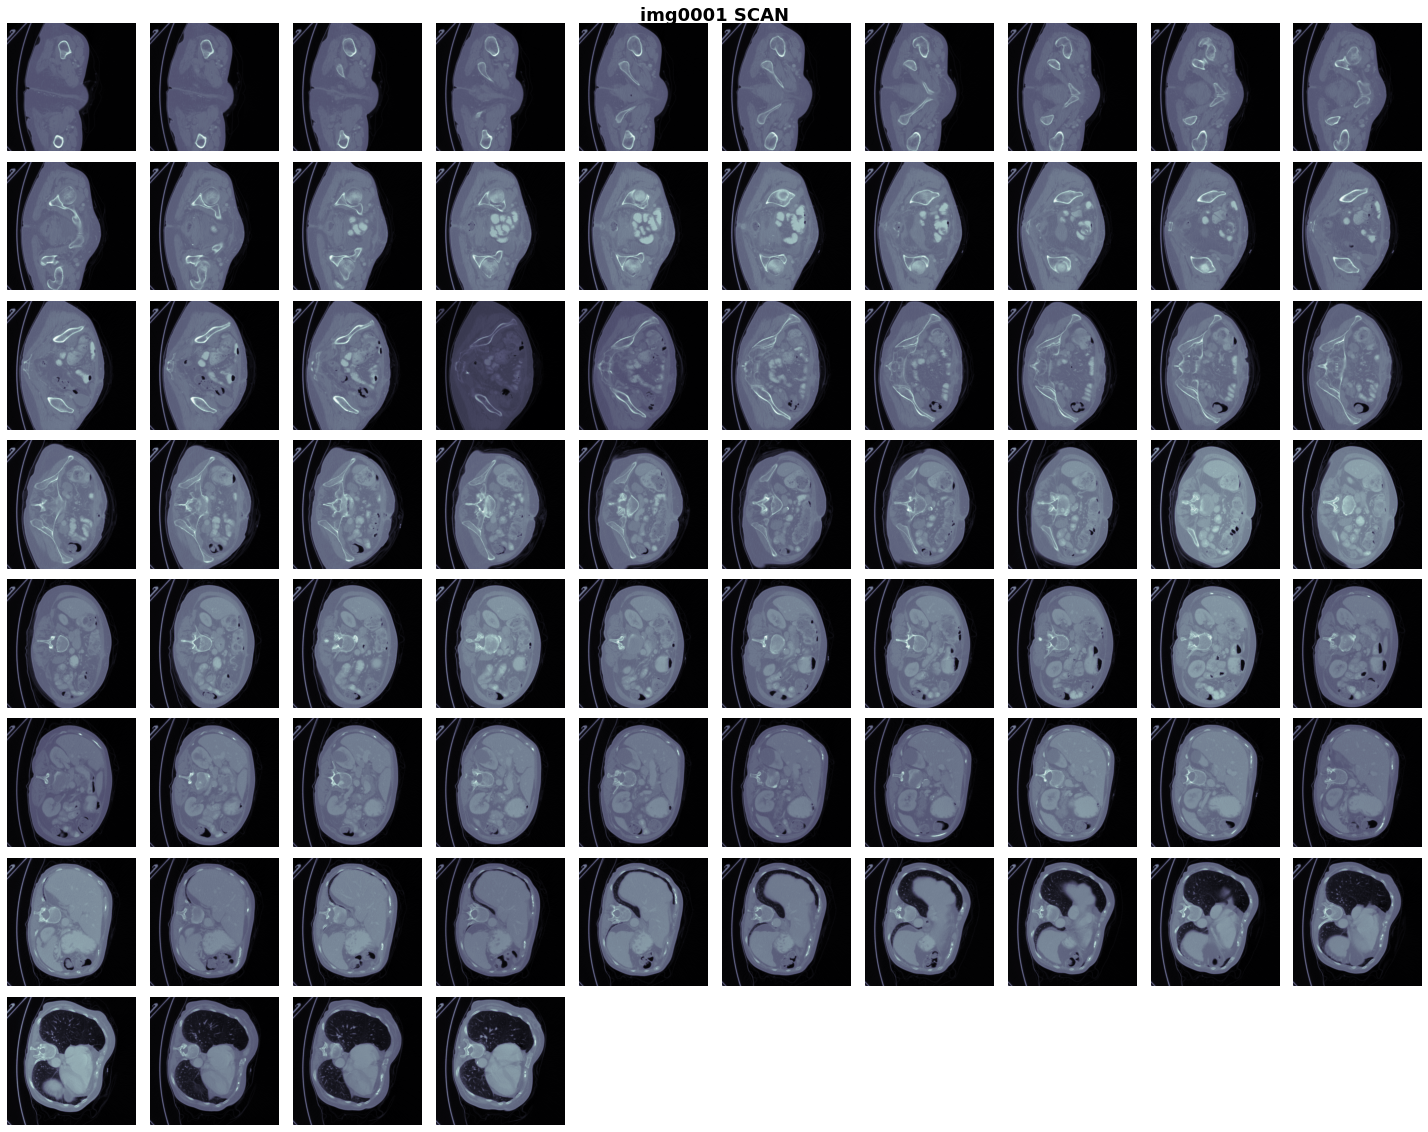

label0001: (512, 512, 147)


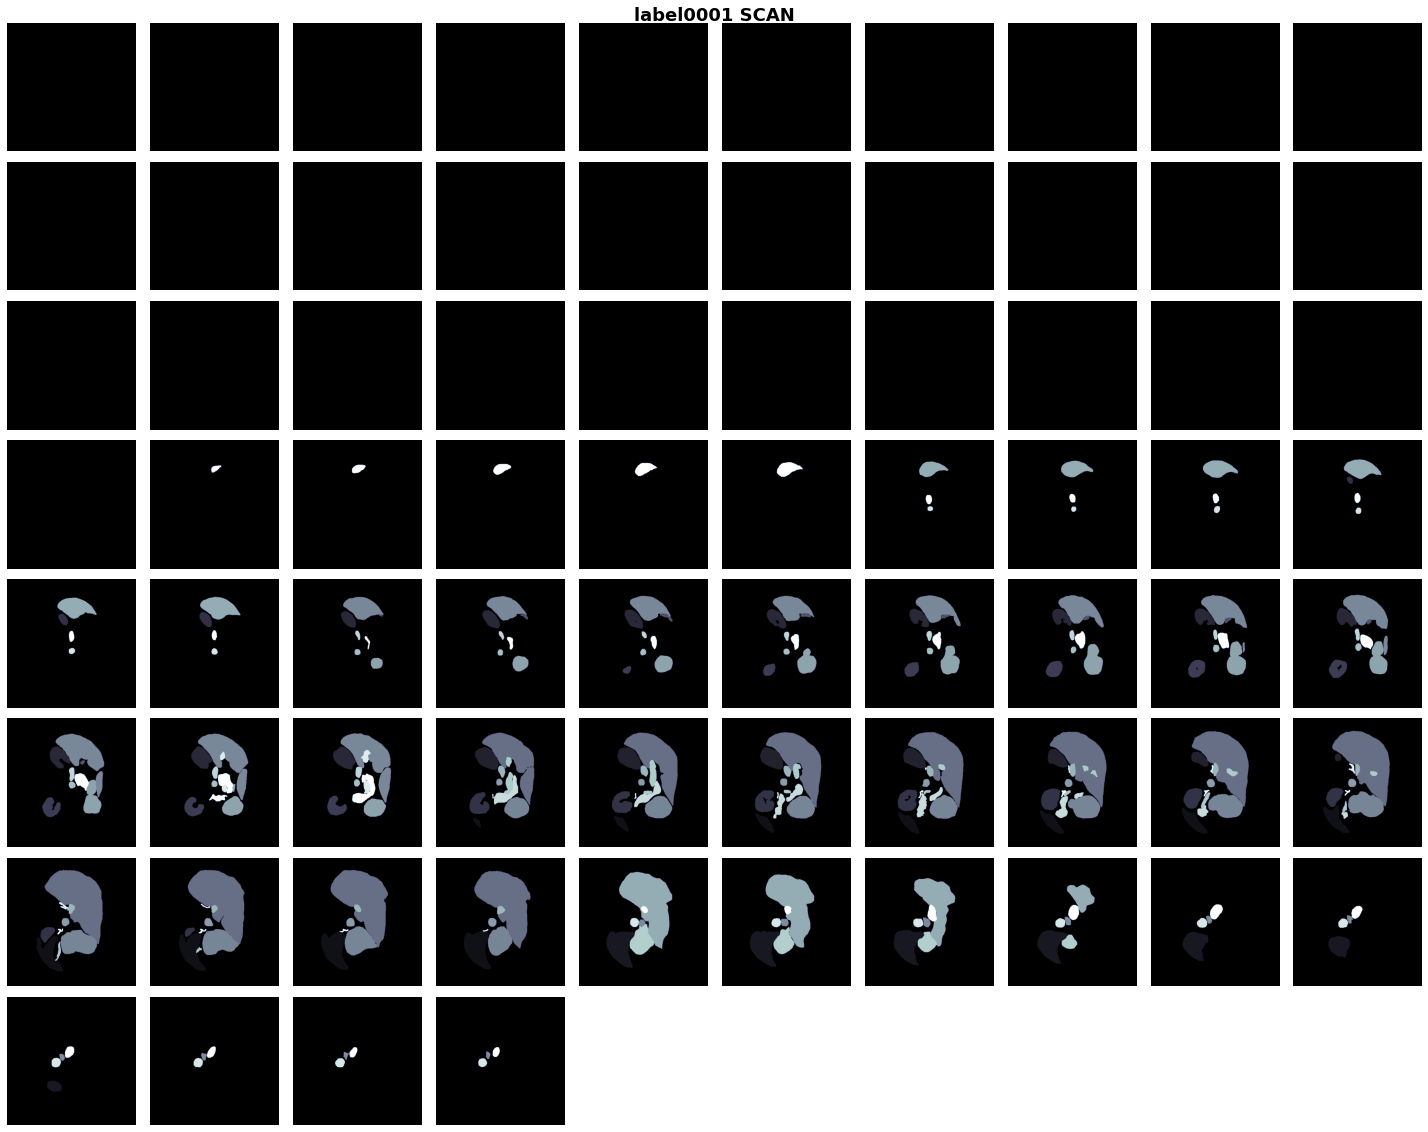

In [4]:
rawdata_trg_dir=os.path.join(path,'RawData','Training')

id='0001'
for i,nil in enumerate([f'{rawdata_trg_dir}/{type}/{type}{id}.nii.gz' 
                        for type in ['img','label']]):
    if i==0:
        title=f'img{id}'
    else:
        title=f'label{id}'
    image=nib.load(nil).get_fdata()
    slices=image.shape[-1]
    rows = int(np.ceil((slices/2)/10))
    print(title+':',image.shape)

    plt.figure(figsize=(20,rows*2))
    plt.suptitle((title+' SCAN'),fontsize=18,fontweight='bold')
    for i in range(0,slices,2):
        plt.subplot(rows,10,1+i//2)
        plt.axis(False)
        plt.imshow(image[:,:,i],cmap='bone')
    plt.tight_layout()
    plt.show()

Color Segmentation Map with RawData (0001-d:118)

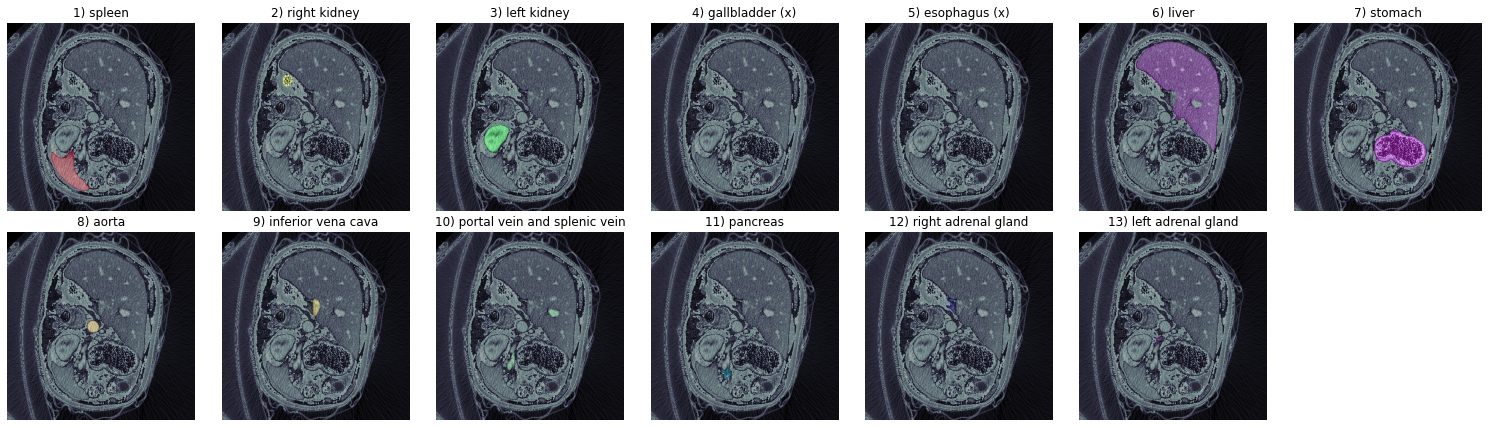

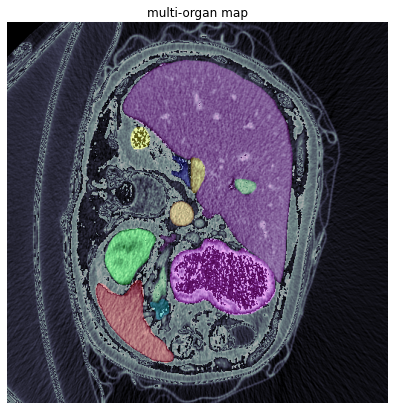

In [10]:
id='0001'

# data
data_path=os.path.join(path,'RawData','Training','img','img'+id+'.nii.gz')
image=nib.load(data_path).get_fdata()
ct=image[:,:,118]

# answer
label_path=os.path.join(path,'RawData','Training','label','label'+id+'.nii.gz')
image=nib.load(label_path).get_fdata()
seg=image[:,:,118]

color_segmentation=np.zeros((512,512,3))
'''
1. Red (spleen), 2. Yellow (right kidney), 3. Green (left kidney), 4. Emerald (gallbladder), 5. Blue (esophagus), 6. Purple (liver), 7. Pink (stomach)
8. Orange (aorta), 9. Deep Yellow (inferior vena cava), 10. Deep Green (portal vein and splenic vein), 11. Deep Emerald (pancreas), 12. Deep Blue (right adrenal gland), 13. Deep Purple (left adrenal gland)
'''
infor_array=['spleen','right kidney','left kidney','gallbladder','esophagus','liver','stomach','aorta','inferior vena cava','portal vein and splenic vein','pancreas','right adrenal gland','left adrenal gland']
color_array=[[255,0,0],[255,255,0],[0,255,0],[51,255,255],[0,0,255],[153,0,153],[255,0,255],[255,153,0],[255,204,0],[0,102,0],[0,204,204],[0,0,153],[102,0,102]]

# organ 개별로 확인하기
plt.figure(figsize=(7*3,2*3))
for i in range(len(infor_array)):
    plt.subplot(2,7,1+i)
    plt.axis(False)
    color_segmentation=np.zeros((512,512,3))
    filter=np.where(seg==1+i)
    if len(filter[0])==0:
        plt.title(str(i+1)+') '+infor_array[i]+' (x)')
    else:
        plt.title(str(i+1)+') '+infor_array[i])
    color_segmentation[filter]=color_array[i]
    plt.imshow(ct.astype('uint8'),cmap='bone')
    plt.imshow(color_segmentation.astype('uint8'),alpha=0.3,cmap='bone')
plt.tight_layout()
plt.show()

# multi-organ 확인하기
multi_organ_map=np.zeros((512,512,3))
for i in range(len(infor_array)):
    multi_organ_map[seg==1+i]=color_array[i]
plt.figure(figsize=(7,7))
plt.title('multi-organ map')
plt.axis(False)
plt.imshow(ct.astype('uint8'),cmap='bone')
plt.imshow(multi_organ_map.astype('uint8'),alpha=0.3,cmap='bone')
plt.show()

RegData (Training-Training) : 23GB / the pair-wise registrations between training datasets (30 x 29 = 870)
--> 학습 시 이용하지 않으므로 몰라도 됨

In [53]:
pair_id1='0001'
pair_id2='0002'
label_path=os.path.join(path,'RegData','Training-Training','label',pair_id1,('label'+pair_id2+'-'+pair_id1+'.nii.gz'))
image=nib.load(label_path).get_fdata()
title=os.path.basename(label_path)
print(image.shape)

for i in range(image.shape[-1]):
    answer=image[:,:,i]
    print(f'{title}[:,:,{i}]',np.unique(answer,return_counts=True))

(512, 512, 147)
label0002-0001.nii.gz[:,:,0] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,1] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,2] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,3] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,4] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,5] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,6] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,7] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,8] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,9] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,10] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,11] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,12] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,13] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,14] (array([0.]), array([262144]))
label0002-0001.nii.gz[:,:,15] (array([0.]), array([262144]))
label0002-0001.nii

img0002-0001: (512, 512, 147)


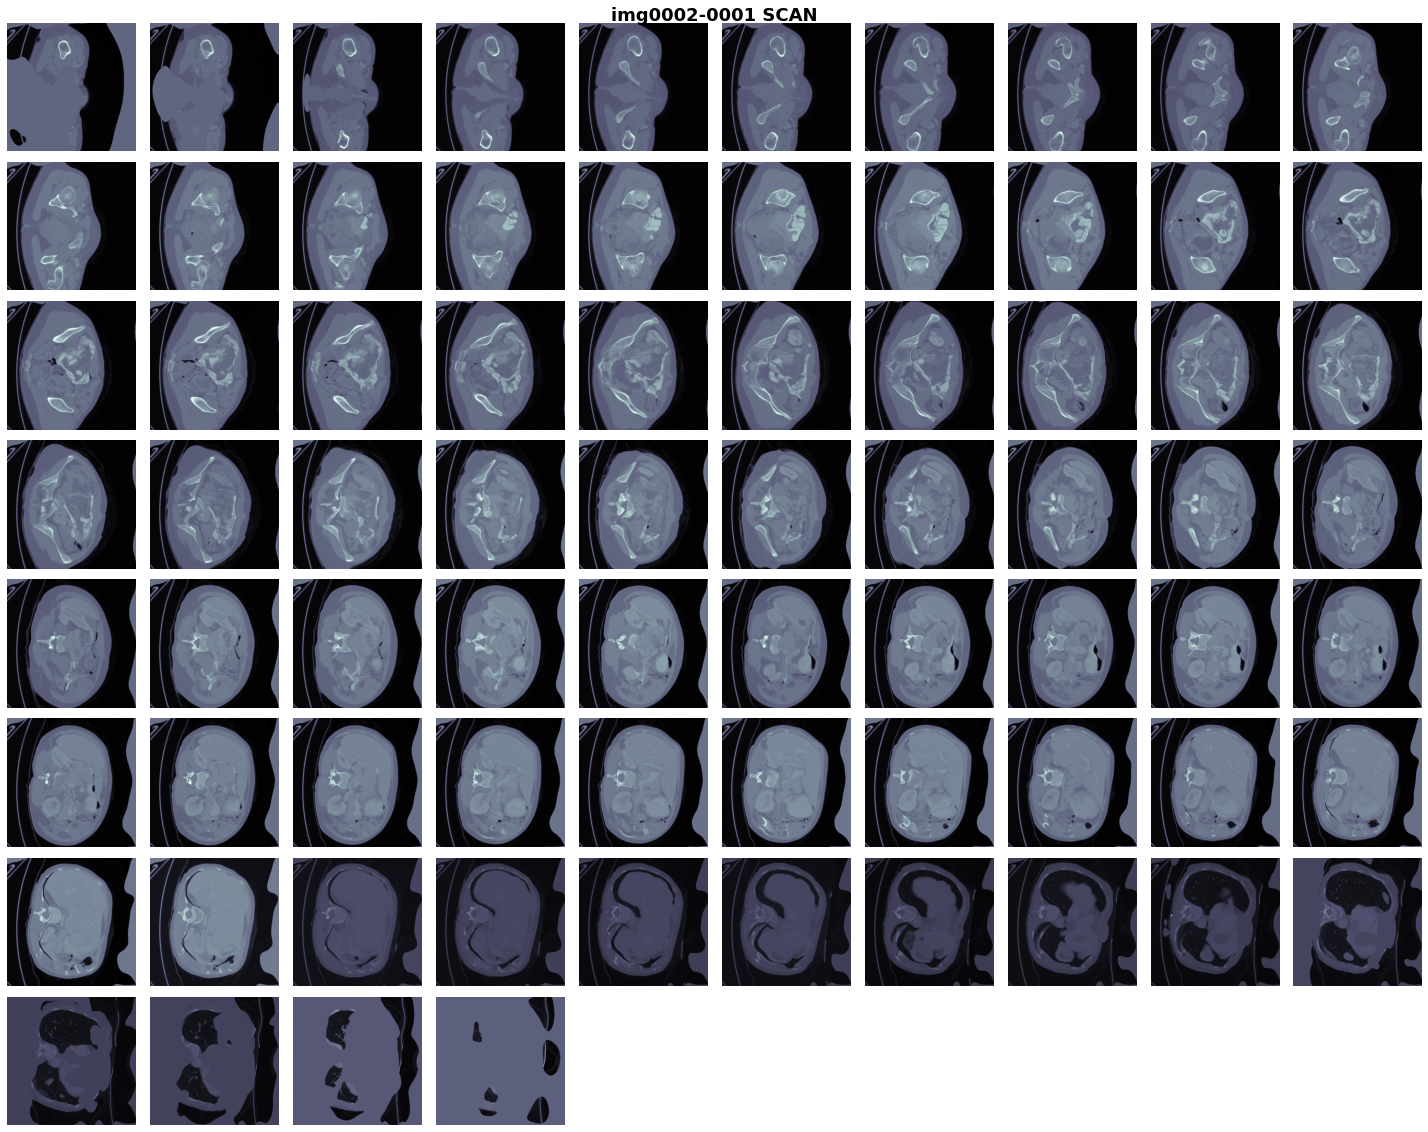

label0002-0001: (512, 512, 147)


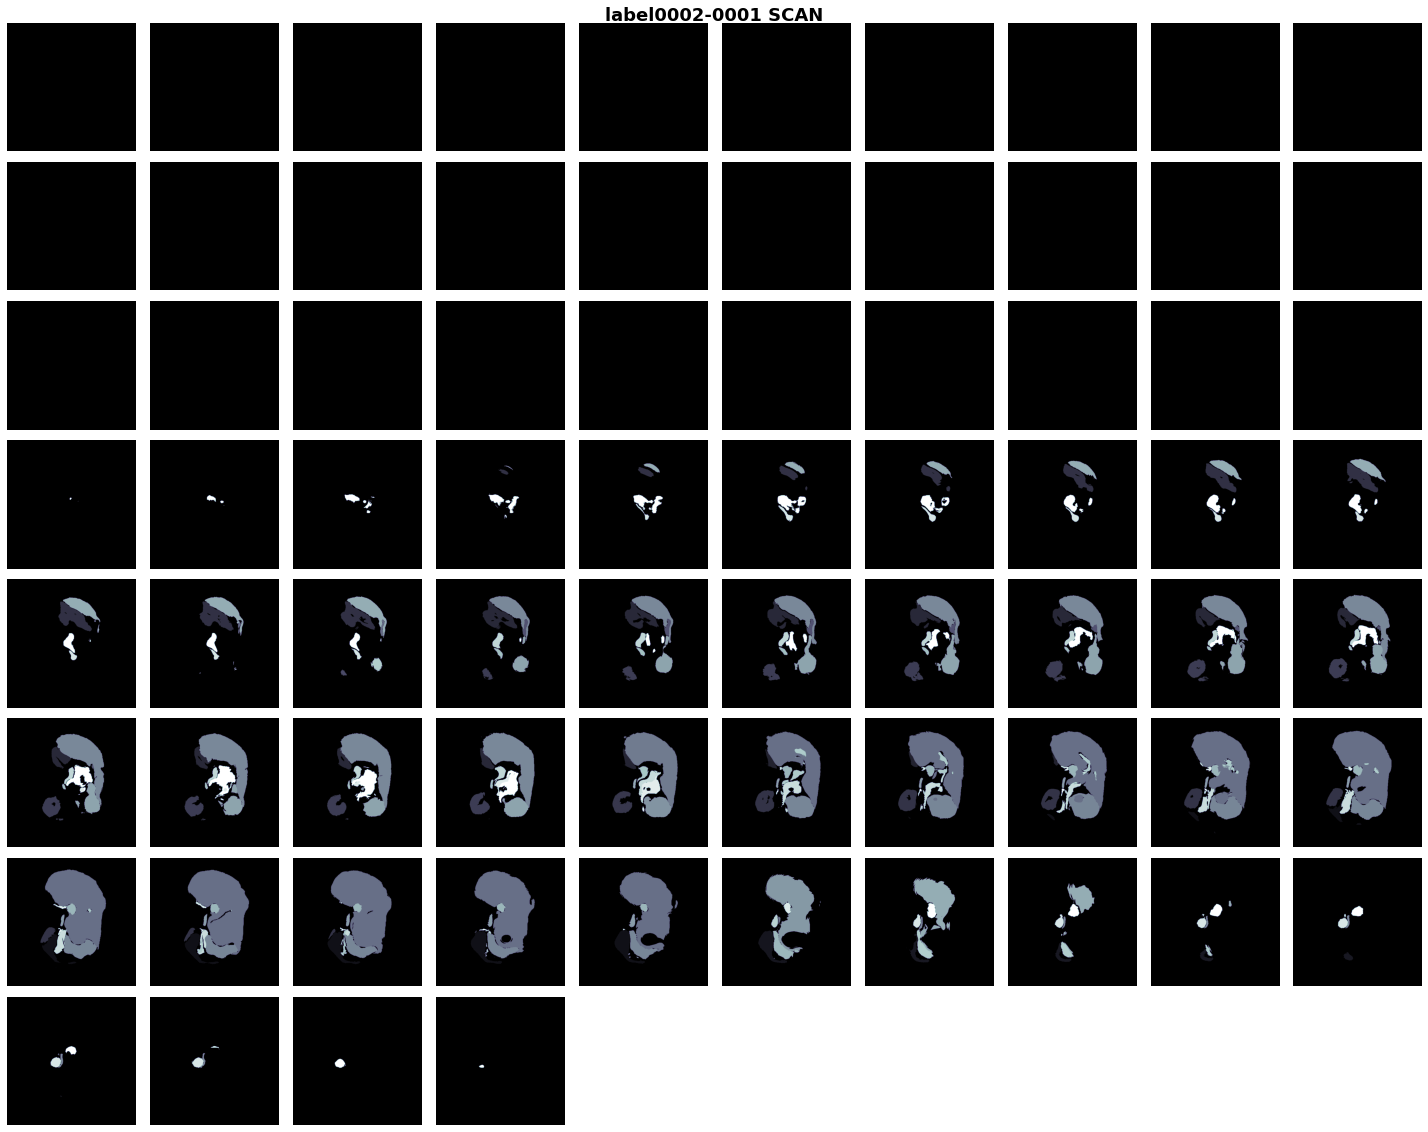

In [51]:
regdata_trg_dir=os.path.join(path,'RegData','Training-Training')

pair_id1='0001'
pair_id2='0002'
for i,nil in enumerate([f'{regdata_trg_dir}/{type}/{pair_id1}/{type}{pair_id2}-{pair_id1}.nii.gz' 
                        for type in ['img','label']]):
    if i==0:
        title=f'img{pair_id2}-{pair_id1}'
    else:
        title=f'label{pair_id2}-{pair_id1}'
    image=nib.load(nil).get_fdata()
    slices=image.shape[-1]
    rows = int(np.ceil((slices/2)/10))
    print(title+':',image.shape)

    plt.figure(figsize=(20,rows*2))
    plt.suptitle((title+' SCAN'),fontsize=18,fontweight='bold')
    for i in range(0,slices,2):
        plt.subplot(rows,10,1+i//2)
        plt.axis(False)
        plt.imshow(image[:,:,i],cmap='bone')
    plt.tight_layout()
    plt.show()